Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import csv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = csv.DictReader(f)
    enrollments = list(reader)
    
print enrollments[0]

{'status': 'canceled', 'is_udacity': 'True', 'is_canceled': 'True', 'join_date': '2014-11-10', 'account_key': '448', 'cancel_date': '2015-01-14', 'days_to_cancel': '65'}


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
def read_csv(csv_file):
    with open(csv_file, 'rb') as f:
        reader = csv.DictReader(f)
        return list(reader)

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')


print daily_engagement[0]
print '-'*25
print project_submissions[0]

{'lessons_completed': '0.0', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'projects_completed': '0.0', 'acct': '0', 'utc_date': '2015-01-09'}
-------------------------
{'lesson_key': '3176718735', 'processing_state': 'EVALUATED', 'account_key': '256', 'assigned_rating': 'UNGRADED', 'completion_date': '2015-01-16', 'creation_date': '2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    elif type(date) not in (str, unicode):
        return date
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    elif not i:
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

num_enrollments =  len(enrollments)
students_enrolled =  len(set([enrollments[i]['account_key'] for i in range(len(enrollments))]))

num_engagement =  len(daily_engagement)
students_engagement =  len(set([daily_engagement[i]['acct'] for i in range(len(daily_engagement))]))


num_submissions =  len(project_submissions)
students_submissions =  len(set([project_submissions[i]['account_key'] for i in range(len(project_submissions))]))

print num_enrollments, students_enrolled
print num_engagement, students_engagement
print num_submissions, students_submissions


1640 1302
136240 1237
3642 743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for row in daily_engagement:
    if 'acct' in row.keys():
        row['account_key'] = row['acct']
        del row['acct']
print daily_engagement[0]['account_key']

0


In [8]:
def get_unique_students(data):
    uniques = set()
    for row in data:
        uniques.add(row['account_key'])
    return uniques

In [9]:
print 'Enrollments: %i' % len(get_unique_students(enrollments))
print 'Engagements: %i' % len(get_unique_students(daily_engagement))

Enrollments: 1302
Engagements: 1237


## Missing Engagement Records

In [10]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
unique_engage = get_unique_students(daily_engagement)
for enroll in enrollments:
    student = enroll['account_key']
    if student not in unique_engage:
        print enroll
        break



{'status': 'canceled', 'is_udacity': False, 'is_canceled': True, 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'account_key': '1219', 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0}


## Checking for More Problem Records

In [11]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

problems = []
unique_engage = get_unique_students(daily_engagement)
for enroll in enrollments:
    student = enroll['account_key']
    if student not in unique_engage and (enroll['days_to_cancel']>0 or enroll['days_to_cancel'] is None):
        problems.append(enroll)

print problems



[{'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59}, {'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99}, {'status': 'current', 'is_udacity': True, 'is_canceled': False, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'account_key': '1101', 'cancel_date': None, 'days_to_cancel': None}]


## Tracking Down the Remaining Problems

In [12]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
print len(udacity_test_accounts)
print udacity_test_accounts

6
set(['1304', '1069', '448', '312', '818', '1101'])


In [13]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [14]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [15]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

print non_udacity_enrollments[0]

paid_students = {}
for i in non_udacity_enrollments:
    if not i['is_canceled'] or i['days_to_cancel'] > 7:
        acnt, jd = i['account_key'], i['join_date']
        
        if acnt not in paid_students.keys() or paid_students[acnt] < jd:
            paid_students[acnt] = jd


print len(paid_students.keys())
print paid_students[paid_students.keys()[0]]

{'status': 'canceled', 'is_udacity': False, 'is_canceled': True, 'join_date': datetime.datetime(2014, 11, 10, 0, 0), 'account_key': '700', 'cancel_date': datetime.datetime(2014, 11, 16, 0, 0), 'days_to_cancel': 6}
995
2015-03-04 00:00:00


## Getting Data from First Week

In [16]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0

In [17]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
# print non_udacity_engagement[0]

paid_engagement_in_first_week = []
for engage in non_udacity_engagement:
    
    key = engage['account_key']
    if key in paid_students.keys():
        join, en_date =  paid_students[key],  engage['utc_date']
        if key in paid_students.keys() and within_one_week(join, en_date):
            paid_engagement_in_first_week.append(engage)
            
print len(paid_engagement_in_first_week)

6919


## Exploring Student Engagement

In [18]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [19]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [20]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)



Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [21]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

student_max_time = None
max_min = 0

for student, total_min in total_minutes_by_account.items():
    if total_min > max_min:
        max_min = total_min
        student_max_time = student
print student, max_min

479 3564.7332645


In [22]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_max_time:
        print engagement_record

{'lessons_completed': 4, 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{'lessons_completed': 6, 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{'lessons_completed': 6, 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{'lessons_completed': 2, 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{'lessons_completed': 1, 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{'lessons_completed': 1, 'num_courses_visited': 2, 'total_minutes_

## Lessons Completed in First Week

In [23]:
# function for grouping by student and taking the dependant variable
def group_by_key(data):
    accounts = defaultdict(list)
    for record in data:
        key = record['account_key']
        accounts[key].append(record)
    return accounts

def group_for_value(accounts, variable):
    d = {}
    for key, data in accounts.items():
        total = 0
        for record in data:
            total += record[variable]
        d[key] = total
    return d

def group_for_value_binary(accounts, variable):
    d = {}
    for key, data in accounts.items():
        total = 0
        for record in data:
            if record[variable]>0:
                total += 1                
        d[key] = total
    return d

def summary_stats(data):
    totals = data.values()
    mean = np.mean(totals)
    std = np.std(totals)
    mn = np.min(totals)
    mx = np.max(totals)
    
    print '\nMean:', mean
    print 'Standard deviation:', std
    print 'Minimum:', mn
    print 'Maximum:', mx
    
    return mean, std, mn, mx

In [24]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

mins = group_for_value(group_by_key(paid_engagement_in_first_week),'lessons_completed')

# Summarize the data about minutes spent in the classroom
total_minutes = mins.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)


summary_stats(group_for_value(group_by_key(paid_engagement_in_first_week),'lessons_completed'))

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


(1.636180904522613, 3.0025612998294227, 0, 36)

## Number of Visits in First Week

In [25]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

summary_stats(group_for_value_binary(group_by_key(paid_engagement_in_first_week),'num_courses_visited'))


Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


(2.8673366834170855, 2.2551980029196814, 0, 7)

## Splitting out Passing Students

In [26]:
non_udacity_submissions[0]

paid_engagement_in_first_week[0]

{'account_key': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [27]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in non_udacity_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [28]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
data = [i['total_minutes_visited'] for i in passing_engagement]
print 'Passing:', sum(data)/len(data)

data = [i['total_minutes_visited'] for i in non_passing_engagement]
print 'Non-Passing:', sum(data)/len(data)


np.mean(data)
print '\n'
print 'Mean:', np.mean(data)
print 'Standard deviation:', np.std(data)
print 'Minimum:', np.min(data)
print 'Maximum:', np.max(data)



Passing: 56.3943388723
Non-Passing: 20.8518449184


Mean: 20.8518449184
Standard deviation: 58.02987299
Minimum: 0.0
Maximum: 695.856335001


## Making Histograms

['lessons_completed', 'num_courses_visited', 'total_minutes_visited', 'projects_completed', 'account_key', 'utc_date']
Mean: 0.293351005081
Standard deviation: 0.740812195739
Minimum: 0
Maximum: 10
Mean: 0.125418060201
Standard deviation: 0.584918662677
Minimum: 0
Maximum: 12


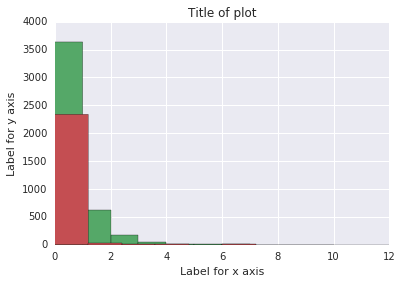

In [43]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
import seaborn as sns
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

## ----------------------------------------


dataP = [i['lessons_completed'] for i in passing_engagement]
#plt.hist(dataP)

dataN = [i['lessons_completed'] for i in non_passing_engagement]
#plt.hist(dataN)

print non_passing_engagement[0].keys()


# Summarize the given data
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    #plt.hist(data)
    plt.hist(data, bins=10) 
    plt.xlabel("Label for x axis")
    plt.ylabel("Label for y axis")
    plt.title("Title of plot")
    
describe_data(dataP)
describe_data(dataN)


## Improving Plots and Sharing Findings

In [44]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.



plt.hist(non_passing_engagement.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(non_passing_engagement.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

AttributeError: 'list' object has no attribute 'values'